In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx

In [2]:
dataset = pd.read_excel('Egyptian_Grocery_Transactions.xlsx', header=None)
dataset

,0
0,"سكر,لبن,شاي"
1,"فراخ,بطاطس"
2,"رز,فراخ"
3,"عسل,لحمة,رز,زبادي"
4,"بصل,رز,عدس"
5,"شيبسي,فلفل,بيبسي,مياه"
6,"فراخ,بطاطس,شيبسي"
7,"طماطم,عدس,كورن فليكس"
8,"عسل,مربة,زيت,عيش بلدي"
9,"فراخ,مكرونة,شاي,كشري,سكر,سمنة"


In [3]:
transactions = (dataset.iloc[:, 0].astype(str).str.split(',').tolist())
transactions

[['سكر', 'لبن', 'شاي'],
 ['فراخ', 'بطاطس'],
 ['رز', 'فراخ'],
 ['عسل', 'لحمة', 'رز', 'زبادي'],
 ['بصل', 'رز', 'عدس'],
 ['شيبسي', 'فلفل', 'بيبسي', 'مياه'],
 ['فراخ', 'بطاطس', 'شيبسي'],
 ['طماطم', 'عدس', 'كورن فليكس'],
 ['عسل', 'مربة', 'زيت', 'عيش بلدي'],
 ['فراخ', 'مكرونة', 'شاي', 'كشري', 'سكر', 'سمنة'],
 ['عسل', 'عدس'],
 ['زيت', 'بيض', 'فول', 'مكرونة', 'صلصة', 'جبنة قريش'],
 ['شاي', 'عدس', 'عسل', 'زيت', 'بيبسي', 'بيض'],
 ['رز', 'عدس', 'كشري'],
 ['كشري', 'عيش بلدي'],
 ['لبن', 'بيبسي', 'مربة'],
 ['سكر', 'عيش بلدي', 'مكرونة'],
 ['بيبسي', 'زبادي', 'طعمية'],
 ['بيبسي', 'سكر', 'زيت', 'عدس', 'فول', 'بيض'],
 ['بيض', 'بيبسي', 'طعمية', 'سكر', 'سمنة', 'جبنة قريش']]

In [4]:
te = TransactionEncoder()
te_ary = te.fit_transform(transactions)
data_encoded = pd.DataFrame(te_ary, columns=te.columns_, dtype=bool)
data_encoded.head()

,بصل,بطاطس,بيبسي,بيض,جبنة قريش,رز,زبادي,زيت,سكر,سمنة,...,فراخ,فلفل,فول,كشري,كورن فليكس,لبن,لحمة,مربة,مكرونة,مياه
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
frequent_itemsets = apriori(data_encoded, min_support=0.1, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
frequent_itemsets.head(10)

,support,itemsets
12,0.30,(عدس)
1,0.30,(بيبسي)
7,0.25,(سكر)
15,0.20,(فراخ)
2,0.20,(بيض)
4,0.20,(رز)
6,0.20,(زيت)
13,0.20,(عسل)
17,0.15,(كشري)
22,0.15,"(بيبسي, بيض)"


In [6]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.3)
strong_rules = rules[(rules['confidence'] > 0.7) & (rules['lift'] > 1.5)]
strong_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,(بيض),(بيبسي),0.2,0.30,0.15,0.75,2.50,1.0,0.090,2.8,0.750000,0.428571,0.642857,0.625
2,(زيت),(بيض),0.2,0.20,0.15,0.75,3.75,1.0,0.110,3.2,0.916667,0.600000,0.687500,0.750
3,(بيض),(زيت),0.2,0.20,0.15,0.75,3.75,1.0,0.110,3.2,0.916667,0.600000,0.687500,0.750
5,(سمنة),(سكر),0.1,0.25,0.10,1.00,4.00,1.0,0.075,inf,0.833333,0.400000,1.000000,0.700
7,(فول),(زيت),0.1,0.20,0.10,1.00,5.00,1.0,0.080,inf,0.888889,0.500000,1.000000,0.750


In [7]:
weak_rules = rules[(rules['confidence'] <= 0.5) & (rules['confidence'] >= 0.3)]
weak_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(بيبسي),(بيض),0.30,0.2,0.15,0.5,2.5,1.0,0.090,1.6,0.857143,0.428571,0.375000,0.625
4,(سكر),(سمنة),0.25,0.1,0.10,0.4,4.0,1.0,0.075,1.5,1.000000,0.400000,0.333333,0.700
6,(زيت),(فول),0.20,0.1,0.10,0.5,5.0,1.0,0.080,1.8,1.000000,0.500000,0.444444,0.750
8,(زيت),(عسل),0.20,0.2,0.10,0.5,2.5,1.0,0.060,1.6,0.750000,0.333333,0.375000,0.500
9,(عسل),(زيت),0.20,0.2,0.10,0.5,2.5,1.0,0.060,1.6,0.750000,0.333333,0.375000,0.500


In [8]:
import os
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

C:\Users\core2duo\anaconda3\lib\site-packages\fontTools\misc\py23.py:11: DeprecationWarning: The py23 module has been deprecated and will be removed in a future release. Please update your code.
  warnings.warn(


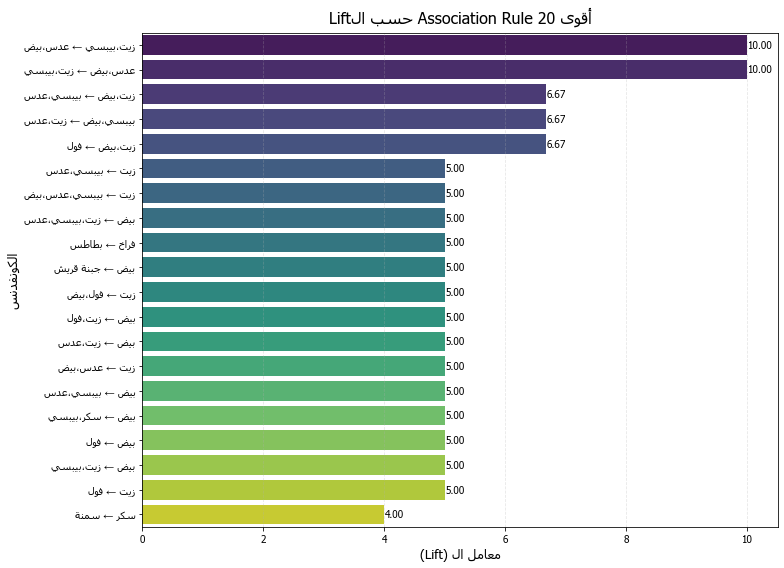

In [9]:
rcParams['font.family'] = 'Tahoma'

# top 20 Rules
top_rules = strong_rules.sort_values(by='lift', ascending=False).head(20)

# دالة لتحويل النص العربي
def reshape_arabic_text(items):
    joined = "،".join(items)
    reshaped = arabic_reshaper.reshape(joined)
    return get_display(reshaped)

# تجهيز تسميات القواعد
rule_labels = [
    f"{reshape_arabic_text(row['antecedents'])} ← {reshape_arabic_text(row['consequents'])}"
    for _, row in top_rules.iterrows()  # اتررو تُرجع كل صف ك اندكس
]

plt.figure(figsize=(11, 8))
ax = sns.barplot(
    y=rule_labels,
    x=top_rules['lift'],
    palette='viridis'  # grid
)

#Adding Labels for columns
for i, (value, label) in enumerate(zip(top_rules['lift'], rule_labels)):
    ax.text( #اضافة نص للتشارت
        value + 0.01, i, f"{value:.2f}",
        va='center',
        fontsize=10,
        fontfamily='Tahoma'
    )

# X & Y label Titles
plt.title(get_display(arabic_reshaper.reshape("أقوى 20 Association Rule حسب الLift")), fontsize=16, pad=10)
plt.xlabel(get_display(arabic_reshaper.reshape("معامل ال (Lift)")), fontsize=13)
plt.ylabel(get_display(arabic_reshaper.reshape("الكونفدنس")), fontsize=13)

plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()

#Saving Image
save_name = "Top20_Lift_BarChart.png"
save_path = os.path.join(os.path.expanduser("~"), "Desktop", save_name)
plt.savefig(save_path, dpi=300)
plt.show()

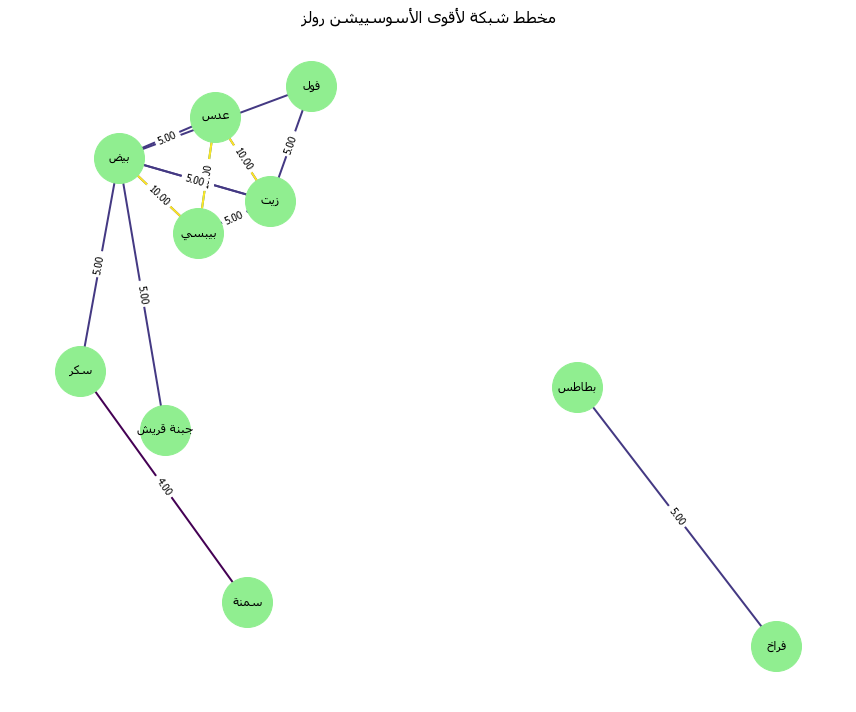

In [12]:
G = nx.DiGraph()

for _, row in top_rules.iterrows():
    lift_value = row['lift']
    for src in row['antecedents']:
        for tgt in row['consequents']:
            src_ar = get_display(arabic_reshaper.reshape(src))
            tgt_ar = get_display(arabic_reshaper.reshape(tgt))
            G.add_edge(src_ar, tgt_ar, weight=lift_value, label=f"{lift_value:.2f}")

# Layout
pos = nx.spring_layout(G, k=1.2, seed=42)

#  الألوان حسب قوة الليفت
edge_weights = [d['weight'] for (_, _, d) in G.edges(data=True)] #عايزين البيانات المرتبطه بالنودز
nodes = G.nodes()

plt.figure(figsize=(12, 10))

# رسم النود
nx.draw_networkx_nodes(G, pos, node_size=2500, node_color='lightgreen')

# رسم النودز مع الألوان حسب الليفت
edges = nx.draw_networkx_edges(
    G, pos,
    edge_color=edge_weights,
    edge_cmap=plt.cm.viridis,
    width=2,
    arrows=True
)


nx.draw_networkx_labels(G, pos, font_size=12, font_family='Tahoma')

# عرض قيم الليفت على الedges
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_family='Tahoma',
    font_size=10,
    label_pos=0.5
)


title = get_display(arabic_reshaper.reshape("مخطط شبكة لأقوى الأسوسييشن رولز"))
plt.title(title, fontsize=16)
plt.axis('off')
plt.tight_layout()


network_file = "Top20_Lift_NetworkGraph.png"
network_path = os.path.join(os.path.expanduser("~"), "Desktop", network_file)
plt.savefig(network_path, dpi=300)
plt.show()